## :-:-:-- Loan Approval Prediction --:-:-:
### Data importing :-

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### Data Cleaning :-

In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
df.drop(['loan_id'],axis=1, inplace=True)

In [5]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [7]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [8]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [10]:
df[' loan_status']=df[' loan_status'].apply(lambda x: 1 if x==' Approved' else 0)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [11]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [12]:
df[' education']=df[' education'].map({
    ' Graduate': 1,
    ' Not Graduate':0
})
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [13]:
df[' self_employed'].value_counts()

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [14]:
df[' self_employed']=df[' self_employed'].apply(lambda x: 0 if x==' Yes' else 1)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,0,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [15]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


### Feature Engineering :-

In [16]:
df['loan_to_income']=df['loan_amount']/df['income_annum']
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income
0,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583
1,0,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610
2,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736
3,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902
4,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,0,1000000,2300000,12,317,2800000,500000,3300000,800000,0,2.300000
4265,0,0,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,3.424242
4266,2,0,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,3.676923
4267,1,0,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,3.121951


In [17]:
df['assets_to_loan']=(df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value'])/df['loan_amount']
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income,assets_to_loan
0,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583,1.695652
1,0,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610,1.393443
2,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736,1.942761
3,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902,1.716612
4,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388,2.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,0,1000000,2300000,12,317,2800000,500000,3300000,800000,0,2.300000,3.217391
4265,0,0,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,3.424242,1.769912
4266,2,0,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,3.676923,1.631799
4267,1,0,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,3.121951,2.250000


In [18]:
df['income_per_dependent']=(df['income_annum']/(df['no_of_dependents']+1)).astype('int')
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income,assets_to_loan,income_per_dependent
0,2,1,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,3.114583,1.695652,3200000
1,0,0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,2.975610,1.393443,4100000
2,3,1,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,3.263736,1.942761,2275000
3,3,1,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,3.743902,1.716612,2050000
4,5,0,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,2.469388,2.272727,1633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,0,1000000,2300000,12,317,2800000,500000,3300000,800000,0,2.300000,3.217391,166666
4265,0,0,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,3.424242,1.769912,3300000
4266,2,0,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,3.676923,1.631799,2166666
4267,1,0,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,3.121951,2.250000,2050000


In [19]:
def categorise_cibil_score(x):
    if x>=300 and x<=579:
        return 1
    elif x>=800 and x<=900:
        return 5
    elif x>=670 and x<=739:
        return 3
    elif x>=740 and x<=799:
        return 4
    else:
        return 2

df['cibil_score']=df['cibil_score'].apply(categorise_cibil_score)

In [20]:
df['estimated_EMI']=(df['loan_amount']/(df['loan_term']*12))
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income,assets_to_loan,income_per_dependent,estimated_EMI
0,2,1,1,9600000,29900000,12,4,2400000,17600000,22700000,8000000,1,3.114583,1.695652,3200000,207638.888889
1,0,0,0,4100000,12200000,8,1,2700000,2200000,8800000,3300000,0,2.975610,1.393443,4100000,127083.333333
2,3,1,1,9100000,29700000,20,1,7100000,4500000,33300000,12800000,0,3.263736,1.942761,2275000,123750.000000
3,3,1,1,8200000,30700000,8,1,18200000,3300000,23300000,7900000,0,3.743902,1.716612,2050000,319791.666667
4,5,0,0,9800000,24200000,20,1,12400000,8200000,29400000,5000000,0,2.469388,2.272727,1633333,100833.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,0,1000000,2300000,12,1,2800000,500000,3300000,800000,0,2.300000,3.217391,166666,15972.222222
4265,0,0,0,3300000,11300000,20,1,4200000,2900000,11000000,1900000,1,3.424242,1.769912,3300000,47083.333333
4266,2,0,1,6500000,23900000,18,1,1200000,12400000,18100000,7300000,0,3.676923,1.631799,2166666,110648.148148
4267,1,0,1,4100000,12800000,8,4,8200000,700000,14100000,5800000,1,3.121951,2.250000,2050000,133333.333333


In [21]:
df['EMI_isto_income']=(df['estimated_EMI']/(df['income_annum']/12))
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_to_income,assets_to_loan,income_per_dependent,estimated_EMI,EMI_isto_income
0,2,1,1,9600000,29900000,12,4,2400000,17600000,22700000,8000000,1,3.114583,1.695652,3200000,207638.888889,0.259549
1,0,0,0,4100000,12200000,8,1,2700000,2200000,8800000,3300000,0,2.975610,1.393443,4100000,127083.333333,0.371951
2,3,1,1,9100000,29700000,20,1,7100000,4500000,33300000,12800000,0,3.263736,1.942761,2275000,123750.000000,0.163187
3,3,1,1,8200000,30700000,8,1,18200000,3300000,23300000,7900000,0,3.743902,1.716612,2050000,319791.666667,0.467988
4,5,0,0,9800000,24200000,20,1,12400000,8200000,29400000,5000000,0,2.469388,2.272727,1633333,100833.333333,0.123469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,0,1000000,2300000,12,1,2800000,500000,3300000,800000,0,2.300000,3.217391,166666,15972.222222,0.191667
4265,0,0,0,3300000,11300000,20,1,4200000,2900000,11000000,1900000,1,3.424242,1.769912,3300000,47083.333333,0.171212
4266,2,0,1,6500000,23900000,18,1,1200000,12400000,18100000,7300000,0,3.676923,1.631799,2166666,110648.148148,0.204274
4267,1,0,1,4100000,12800000,8,4,8200000,700000,14100000,5800000,1,3.121951,2.250000,2050000,133333.333333,0.390244


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   int64  
 2   self_employed             4269 non-null   int64  
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   int64  
 7   residential_assets_value  4269 non-null   int64  
 8   commercial_assets_value   4269 non-null   int64  
 9   luxury_assets_value       4269 non-null   int64  
 10  bank_asset_value          4269 non-null   int64  
 11  loan_status               4269 non-null   int64  
 12  loan_to_income            4269 non-null   float64
 13  assets_to_loan            4269 non-null   float64
 14  income_p

### Model Training :-

In [23]:
# X=df.drop(['loan_status'],axis=1)

X = df[[
    'no_of_dependents', 
    'education', 
    'self_employed', 
    'cibil_score',          # Categorized cibil score
    'loan_term',
    'loan_to_income',
    'assets_to_loan',       # total asset to loan_amount ratio
    'EMI_isto_income'       # similar to Debt to income ratio
]]

In [24]:
y=df['loan_status']

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [78]:
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(class_weight='balanced'))
])

In [79]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
pipe=Pipeline([
    ('model',RandomForestClassifier(n_estimators=100,max_depth=10, random_state=1))
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [29]:
y.value_counts(normalize=True)

loan_status
1    0.62216
0    0.37784
Name: proportion, dtype: float64

In [37]:
# Scores of the model

print(f"Accuracy Score: {accuracy_score(y_test,y_pred): .4f}")
print(f"Precision Score: {precision_score(y_test,y_pred): .4f}")
print(f"Recall Score: {recall_score(y_test,y_pred): .4f}")
print(f"F1 Score: {f1_score(y_test,y_pred): .4f}")

Accuracy Score:  0.9555
Precision Score:  0.9973
Recall Score:  0.9311
F1 Score:  0.9631


In [31]:
X.columns

Index(['no_of_dependents', 'education', 'self_employed', 'cibil_score',
       'loan_term', 'loan_to_income', 'assets_to_loan', 'EMI_isto_income'],
      dtype='object')

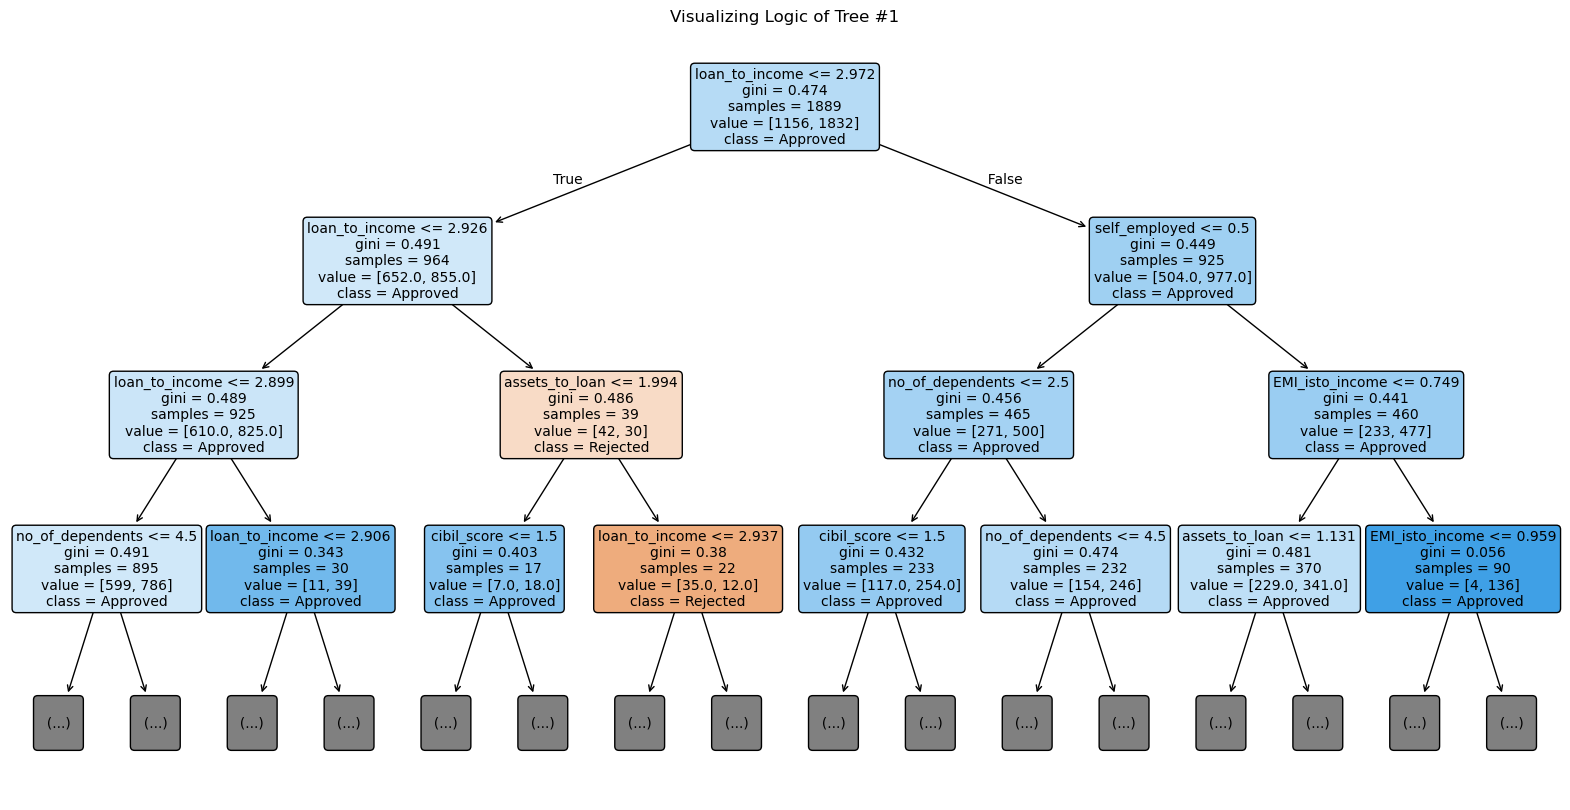

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. Access the Random Forest Model from your Pipeline
rf_model = pipe.named_steps['model']

# 2. Extract just ONE tree (e.g., the first one)
single_tree = rf_model.estimators_[0]

# 3. Setup the Plot
plt.figure(figsize=(20, 10))

# 4. Plot the Tree
plot_tree(single_tree, 
          feature_names=X.columns,       # Your feature names
          class_names=['Rejected', 'Approved'], # 0=Rejected, 1=Approved
          filled=True,                   # Colors the boxes
          rounded=True,                  # Nice corners
          fontsize=10,                   # Readable font
          max_depth=3)                   # Only show top 3 levels

plt.title("Visualizing Logic of Tree #1")
plt.show()

In [40]:
from sklearn.tree import export_text

# Get the rules from the same tree
tree_rules = export_text(single_tree, 
                         feature_names=list(X.columns), 
                         max_depth=5) # Limit depth for readability

print(tree_rules)

|--- loan_to_income <= 2.97
|   |--- loan_to_income <= 2.93
|   |   |--- loan_to_income <= 2.90
|   |   |   |--- no_of_dependents <= 4.50
|   |   |   |   |--- assets_to_loan <= 2.56
|   |   |   |   |   |--- assets_to_loan <= 2.45
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |--- assets_to_loan >  2.45
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |--- assets_to_loan >  2.56
|   |   |   |   |   |--- EMI_isto_income <= 1.36
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |--- EMI_isto_income >  1.36
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- no_of_dependents >  4.50
|   |   |   |   |--- assets_to_loan <= 1.71
|   |   |   |   |   |--- loan_term <= 3.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- loan_term >  3.00
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- assets_to_loan >  1.71
|   |   |   |   |   |--- loan_term <= 13.00
|   |   |   

In [32]:
import pandas as pd
import random

# --- 1. Define 50 Unique Scenarios (Raw Data) ---
scenarios = []

# A. The "Impossible" High Ratio Loans (Should Reject)
for i in range(10):
    scenarios.append({
        "desc": f"Impossible Ratio {i+1}",
        "income": 100000 + (i*50000),      # Low Income (1L - 5.5L)
        "loan": 10000000 + (i*2000000),    # Huge Loan (1Cr - 2.8Cr)
        "cibil": 850,                      # Perfect CIBIL (Trying to trick model)
        "term": 20, "assets": 500000, "deps": 2, "edu": 1, "self_emp": 0
    })

# B. The "Perfect" Candidates (Should Approve)
for i in range(10):
    scenarios.append({
        "desc": f"Perfect Candidate {i+1}",
        "income": 5000000 + (i*500000),    # High Income (50L+)
        "loan": 2000000 + (i*500000),      # Small Loan (20L+)
        "cibil": 800,                      # Great CIBIL
        "term": 10, "assets": 10000000, "deps": 0, "edu": 1, "self_emp": 1
    })

# C. High Income but Terrible Credit (Should Reject)
for i in range(10):
    scenarios.append({
        "desc": f"Bad Credit Rich {i+1}",
        "income": 8000000,                 # Rich (80L)
        "loan": 5000000,                   # Small Loan
        "cibil": 350 + (i*20),             # Terrible CIBIL (350-530)
        "term": 15, "assets": 5000000, "deps": 1, "edu": 1, "self_emp": 0
    })

# D. The "Asset Savior" (Low Income, High Collateral) (Might Approve)
for i in range(10):
    scenarios.append({
        "desc": f"Asset Savior {i+1}",
        "income": 500000,                  # Low Income (5L)
        "loan": 5000000,                   # High Loan (50L) -> Ratio 10x
        "cibil": 750,                      # Good CIBIL
        "term": 20, "assets": 20000000 + (i*5000000), # Massive Assets (2Cr+)
        "deps": 1, "edu": 0, "self_emp": 1
    })

# E. High EMI Burden (DTI Failure)
for i in range(10):
    # Short term loan creates massive EMI
    scenarios.append({
        "desc": f"High DTI {i+1}",
        "income": 1200000,                 # 12L Income (1L/month)
        "loan": 5000000,                   # 50L Loan
        "cibil": 700,
        "term": 2,                         # 2 Years -> Massive EMI (~2L/month)
        "assets": 2000000, "deps": 3, "edu": 1, "self_emp": 1
    })

# --- 2. Processing & Prediction Loop ---

print(f"{'ID':<3} | {'SCENARIO DESC':<20} | {'LOAN/INC':<8} | {'CIBIL':<5} | {'ASSETS/LN':<9} | {'RESULT'}")
print("-" * 80)

for idx, s in enumerate(scenarios):
    # 1. Feature Engineering (On the fly)
    
    # Loan to Income
    loan_to_income = s['loan'] / s['income'] if s['income'] > 0 else 0
    
    # Assets to Loan
    assets_to_loan = s['assets'] / s['loan'] if s['loan'] > 0 else 0
    
    # EMI to Income
    estimated_emi = s['loan'] / (s['term'] * 12)
    emi_to_income = estimated_emi / (s['income'] / 12) if s['income'] > 0 else 0
    
    # CIBIL Binning
    if s['cibil'] <= 579: cibil_cat = 1
    elif s['cibil'] <= 669: cibil_cat = 2
    elif s['cibil'] <= 739: cibil_cat = 3
    elif s['cibil'] <= 799: cibil_cat = 4
    else: cibil_cat = 5

    # 2. Input Vector
    # [dependents, education, self_employed, cibil_cat, loan_term, loan_to_income, assets_to_loan, emi_to_income]
    input_data = [[s['deps'], s['edu'], s['self_emp'], cibil_cat, 
                   s['term'], loan_to_income, assets_to_loan, emi_to_income]]
    
    # 3. Predict
    pred = pipe.predict(input_data)[0]
    result_icon = "✅ APPROVE" if pred == 1 else "❌ REJECT "
    
    # 4. Print Row
    print(f"{idx+1:<3} | {s['desc']:<20} | {loan_to_income:<8.1f} | {cibil_cat:<5} | {assets_to_loan:<9.1f} | {result_icon}")

ID  | SCENARIO DESC        | LOAN/INC | CIBIL | ASSETS/LN | RESULT
--------------------------------------------------------------------------------
1   | Impossible Ratio 1   | 100.0    | 5     | 0.1       | ❌ REJECT 
2   | Impossible Ratio 2   | 80.0     | 5     | 0.0       | ❌ REJECT 
3   | Impossible Ratio 3   | 70.0     | 5     | 0.0       | ❌ REJECT 
4   | Impossible Ratio 4   | 64.0     | 5     | 0.0       | ❌ REJECT 
5   | Impossible Ratio 5   | 60.0     | 5     | 0.0       | ❌ REJECT 
6   | Impossible Ratio 6   | 57.1     | 5     | 0.0       | ❌ REJECT 
7   | Impossible Ratio 7   | 55.0     | 5     | 0.0       | ❌ REJECT 
8   | Impossible Ratio 8   | 53.3     | 5     | 0.0       | ❌ REJECT 
9   | Impossible Ratio 9   | 52.0     | 5     | 0.0       | ❌ REJECT 
10  | Impossible Ratio 10  | 50.9     | 5     | 0.0       | ❌ REJECT 
11  | Perfect Candidate 1  | 0.4      | 5     | 5.0       | ✅ APPROVE
12  | Perfect Candidate 2  | 0.5      | 5     | 4.0       | ✅ APPROVE
13  | Perfec

C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.w

17  | Perfect Candidate 7  | 0.6      | 5     | 2.0       | ✅ APPROVE
18  | Perfect Candidate 8  | 0.6      | 5     | 1.8       | ✅ APPROVE
19  | Perfect Candidate 9  | 0.7      | 5     | 1.7       | ✅ APPROVE
20  | Perfect Candidate 10 | 0.7      | 5     | 1.5       | ✅ APPROVE
21  | Bad Credit Rich 1    | 0.6      | 1     | 1.0       | ❌ REJECT 
22  | Bad Credit Rich 2    | 0.6      | 1     | 1.0       | ❌ REJECT 
23  | Bad Credit Rich 3    | 0.6      | 1     | 1.0       | ❌ REJECT 
24  | Bad Credit Rich 4    | 0.6      | 1     | 1.0       | ❌ REJECT 
25  | Bad Credit Rich 5    | 0.6      | 1     | 1.0       | ❌ REJECT 
26  | Bad Credit Rich 6    | 0.6      | 1     | 1.0       | ❌ REJECT 
27  | Bad Credit Rich 7    | 0.6      | 1     | 1.0       | ❌ REJECT 
28  | Bad Credit Rich 8    | 0.6      | 1     | 1.0       | ❌ REJECT 
29  | Bad Credit Rich 9    | 0.6      | 1     | 1.0       | ❌ REJECT 
30  | Bad Credit Rich 10   | 0.6      | 1     | 1.0       | ❌ REJECT 
31  | Asset Savior 1

C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.w

39  | Asset Savior 9       | 10.0     | 4     | 12.0      | ✅ APPROVE
40  | Asset Savior 10      | 10.0     | 4     | 13.0      | ✅ APPROVE
41  | High DTI 1           | 4.2      | 3     | 0.4       | ✅ APPROVE
42  | High DTI 2           | 4.2      | 3     | 0.4       | ✅ APPROVE
43  | High DTI 3           | 4.2      | 3     | 0.4       | ✅ APPROVE
44  | High DTI 4           | 4.2      | 3     | 0.4       | ✅ APPROVE
45  | High DTI 5           | 4.2      | 3     | 0.4       | ✅ APPROVE
46  | High DTI 6           | 4.2      | 3     | 0.4       | ✅ APPROVE
47  | High DTI 7           | 4.2      | 3     | 0.4       | ✅ APPROVE
48  | High DTI 8           | 4.2      | 3     | 0.4       | ✅ APPROVE
49  | High DTI 9           | 4.2      | 3     | 0.4       | ✅ APPROVE
50  | High DTI 10          | 4.2      | 3     | 0.4       | ✅ APPROVE


C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.w

In [82]:
# Predicting on custom data values
def pred_data():
    pass

In [97]:
# weights = pipe.named_steps['model'].coef_[0]
# print(weights)

            Feature  Importance
3       cibil_score    0.759224
7   EMI_isto_income    0.074931
5    loan_to_income    0.056396
6    assets_to_loan    0.049827
4         loan_term    0.040461
0  no_of_dependents    0.011291
1         education    0.003953
2     self_employed    0.003918


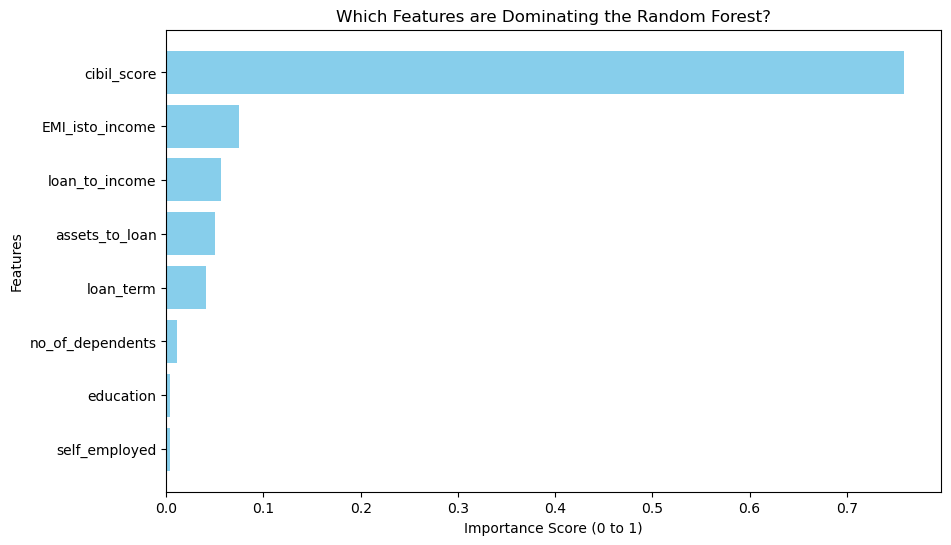

In [96]:
import matplotlib.pyplot as plt

# 1. Get the feature importances array
importances = pipe.named_steps['model'].feature_importances_

# 2. Map them to your column names
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# 3. Sort them (Most dominant on top)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 4. Print the table
print(importance_df)

# 5. Visualize it (Bar Chart)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score (0 to 1)")
plt.ylabel("Features")
plt.title("Which Features are Dominating the Random Forest?")
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.show()

In [95]:
# Testing on some data

# 1. Define a Helper Function to process raw inputs into Model Features
def predict_loan_status(scenario_name, income, loan_amount, cibil_raw, 
                        dependents, education, self_employed, loan_term, total_assets):
    
    # --- A. Feature Engineering (Replicating your logic) ---
    
    # Loan to Income
    loan_to_income = loan_amount / income if income > 0 else 0
    
    # Assets to Loan
    assets_to_loan = total_assets / loan_amount if loan_amount > 0 else 0
    
    # EMI to Income
    estimated_emi = loan_amount / (loan_term * 12)
    emi_to_income = estimated_emi / (income / 12) if income > 0 else 0
    
    # CIBIL Categorization (1-5)
    if cibil_raw <= 579: cibil_cat = 1
    elif cibil_raw <= 669: cibil_cat = 2
    elif cibil_raw <= 739: cibil_cat = 3
    elif cibil_raw <= 799: cibil_cat = 4
    else: cibil_cat = 5  # 800+
        
    # --- B. Prepare Input List [Order must match X.columns] ---
    # [no_of_dependents, education, self_employed, cibil_score, loan_term, loan_to_income, assets_to_loan, EMI_isto_income]
    input_data = [[dependents, education, self_employed, cibil_cat, 
                   loan_term, loan_to_income, assets_to_loan, emi_to_income]]
    
    # --- C. Predict ---
    prediction = pipe.predict(input_data)[0]
    result = "✅ APPROVED" if prediction == 1 else "❌ REJECTED"
    
    # --- D. Print Result ---
    print(f"{scenario_name.ljust(35)} | Ratio: {loan_to_income:.1f}x | CIBIL Cat: {cibil_cat} | -> {result}")

# 2. Run Multiple Test Cases

print(f"{'SCENARIO'.ljust(35)} | {'DETAILS'.ljust(20)} | {'PREDICTION'}")
print("-" * 85)

# Case 1: The "Impossible" Loan (Your bug case)
# 1 Lakh Income, 10 Crore Loan -> Ratio is 1000x (Should Reject)
predict_loan_status("The Impossible Loan", 
                    income=100000, loan_amount=100000000, cibil_raw=850, 
                    dependents=2, education=1, self_employed=0, loan_term=20, total_assets=500000)

# Case 2: The "Perfect" Candidate
# 50 Lakh Income, 1 Crore Loan -> Ratio is 2x (Healthy), Great CIBIL (Should Approve)
predict_loan_status("The Perfect Candidate", 
                    income=5000000, loan_amount=10000000, cibil_raw=820, 
                    dependents=0, education=1, self_employed=0, loan_term=20, total_assets=20000000)

# Case 3: The "Rich but Bad Credit" 
# 50 Lakh Income, 1 Crore Loan (Healthy Ratio), but 400 CIBIL (Should Reject)
predict_loan_status("Rich but Bad Credit", 
                    income=5000000, loan_amount=10000000, cibil_raw=400, 
                    dependents=0, education=1, self_employed=0, loan_term=20, total_assets=20000000)

# Case 4: The "Borderline" Case
# 10 Lakh Income, 60 Lakh Loan -> Ratio 6x (Risky), Good CIBIL (Model decides)
predict_loan_status("The Borderline Case", 
                    income=1000000, loan_amount=6000000, cibil_raw=700, 
                    dependents=2, education=1, self_employed=0, loan_term=15, total_assets=5000000)

# Case 5: The "Asset Heavy" Case
# Low Income (5L), High Loan (50L), but Massive Assets (2 Cr) -> (Might Approve due to collateral)
predict_loan_status("Low Income, High Assets", 
                    income=500000, loan_amount=5000000, cibil_raw=750, 
                    dependents=1, education=0, self_employed=1, loan_term=10, total_assets=20000000)

SCENARIO                            | DETAILS              | PREDICTION
-------------------------------------------------------------------------------------
The Impossible Loan                 | Ratio: 1000.0x | CIBIL Cat: 5 | -> ❌ REJECTED
The Perfect Candidate               | Ratio: 2.0x | CIBIL Cat: 5 | -> ✅ APPROVED
Rich but Bad Credit                 | Ratio: 2.0x | CIBIL Cat: 1 | -> ❌ REJECTED
The Borderline Case                 | Ratio: 6.0x | CIBIL Cat: 3 | -> ❌ REJECTED
Low Income, High Assets             | Ratio: 10.0x | CIBIL Cat: 4 | -> ✅ APPROVED


C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\acer\.conda\envs\master\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.w

### Model Export :-

In [41]:
import pickle
with open('Model.pickle','wb') as f:
    pickle.dump(pipe,f)